In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
ms = pd.read_csv('mushrooms.csv')
ms.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8081,p,k,y,n,f,f,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
1438,e,f,f,w,f,n,f,w,b,p,...,f,w,w,p,w,o,e,k,a,g
6961,p,k,s,n,f,s,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
4018,e,x,f,g,t,n,f,c,b,u,...,s,g,g,p,w,o,p,n,v,d
2814,e,x,f,g,t,n,f,c,b,n,...,s,g,p,p,w,o,p,n,v,d


In [3]:
# checking shape
ms.shape

(8124, 23)

In [4]:
ms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [5]:
# checking the data description
ms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
# checking null value
ms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

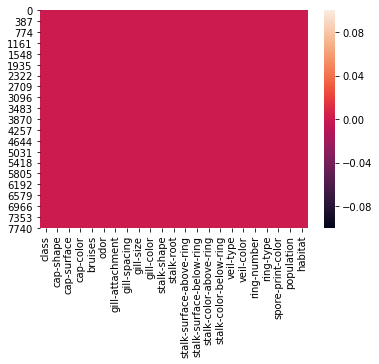

In [7]:
# heatmap of null value
sns.heatmap(ms.isnull())

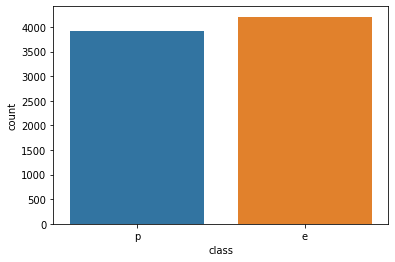

In [8]:
sns.countplot(x=ms['class'],data=ms)

In [9]:
def plt_data(hue,data):
    for i,col in enumerate(ms.columns):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11,8)})
        sns.countplot(x=ms[col],hue=hue,data=ms)

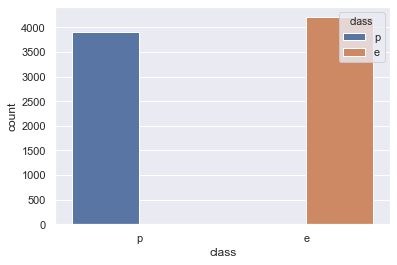

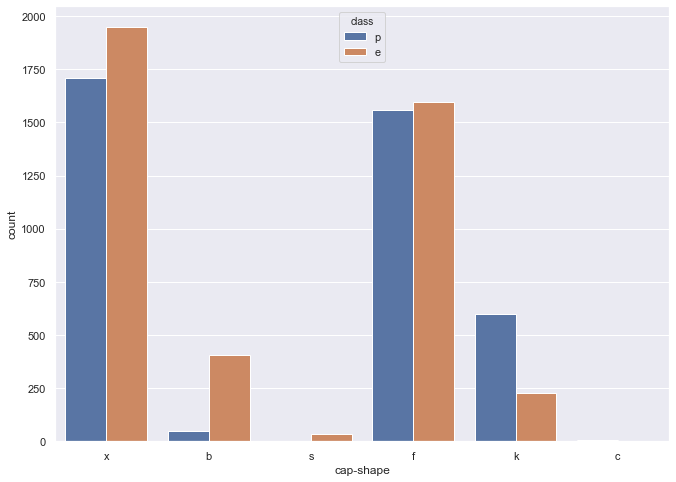

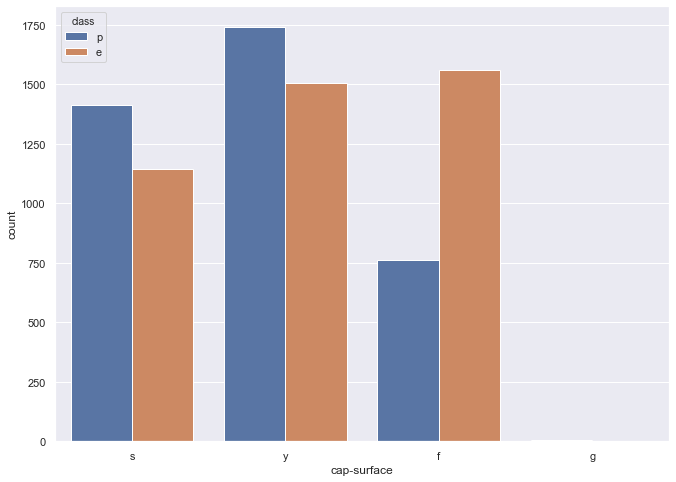

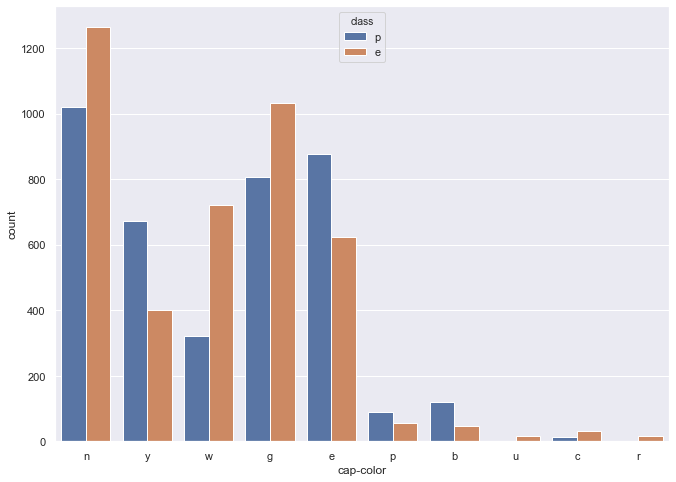

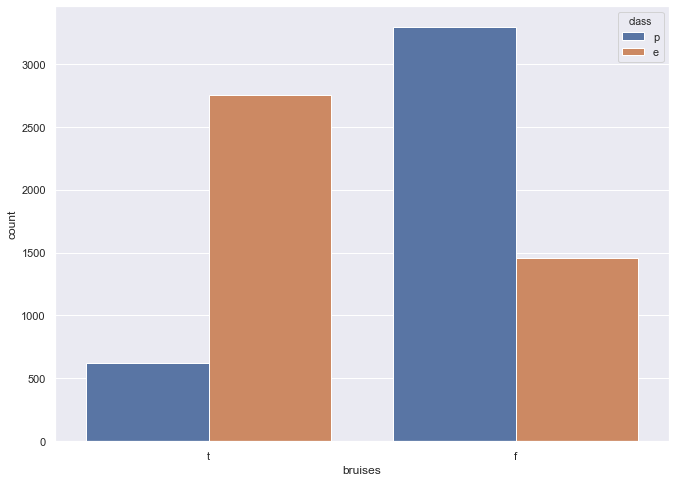

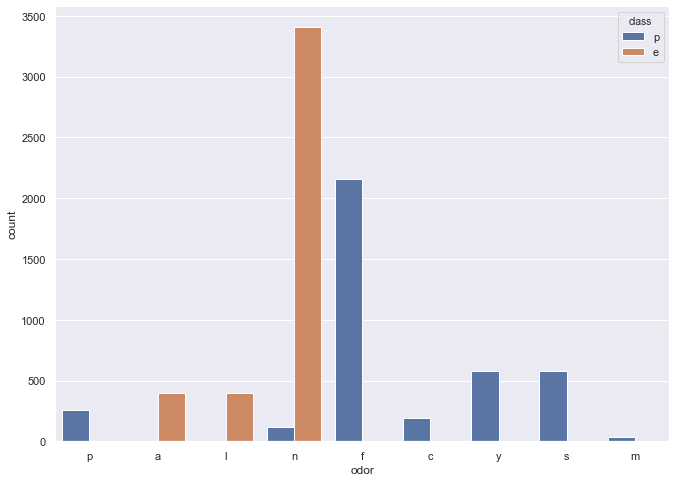

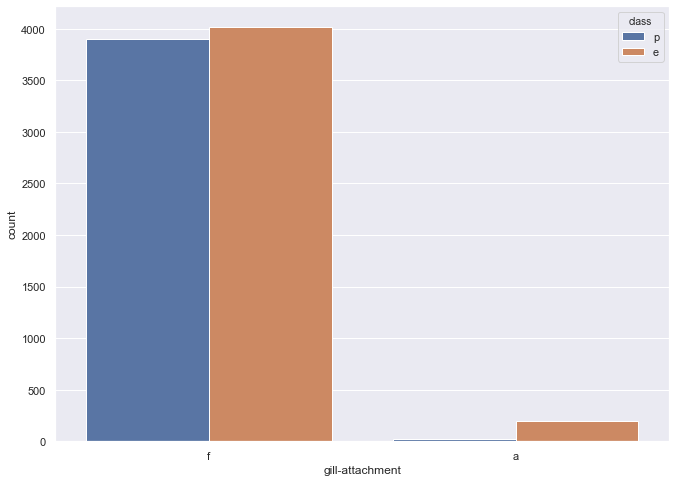

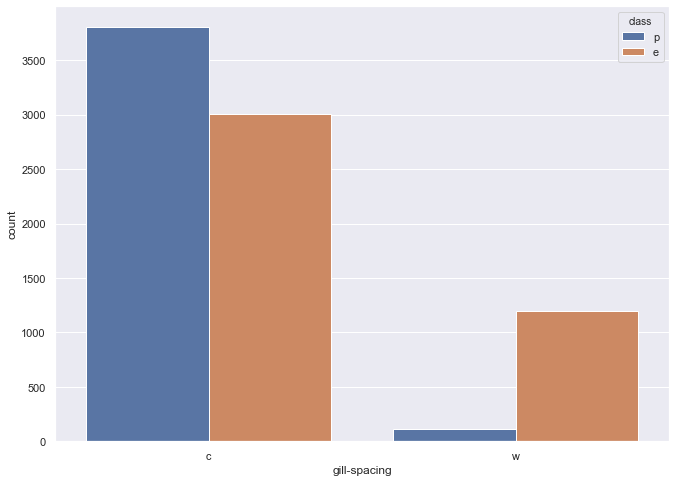

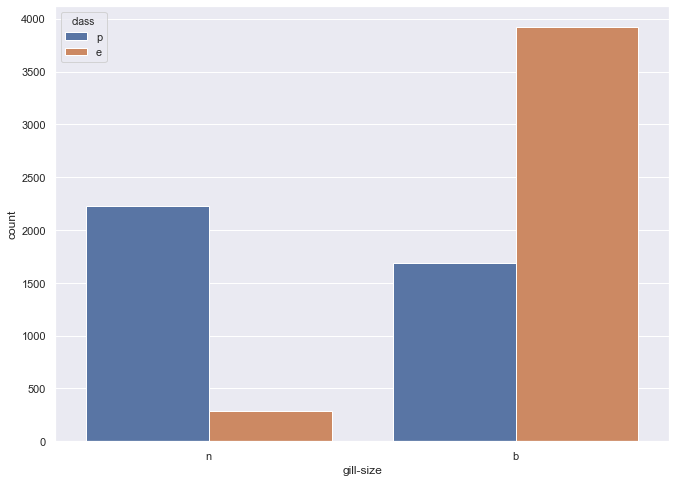

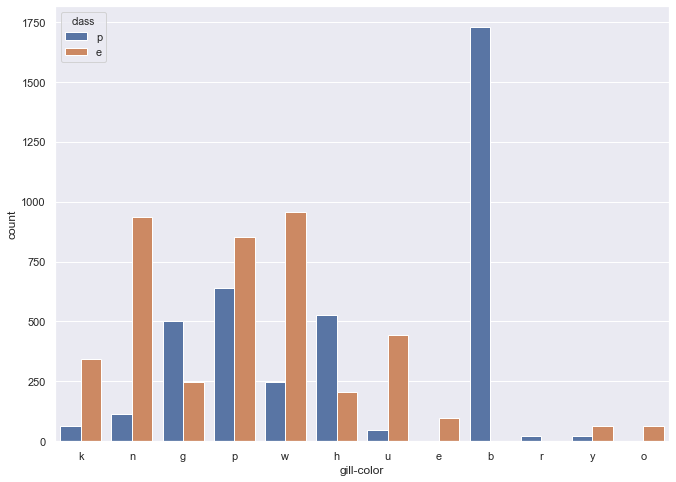

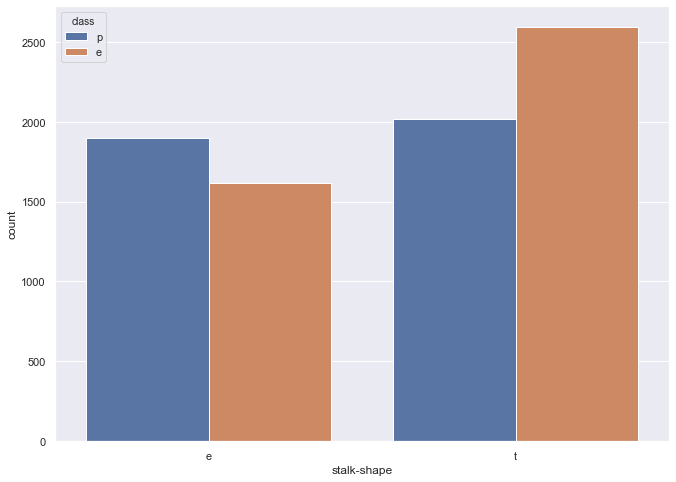

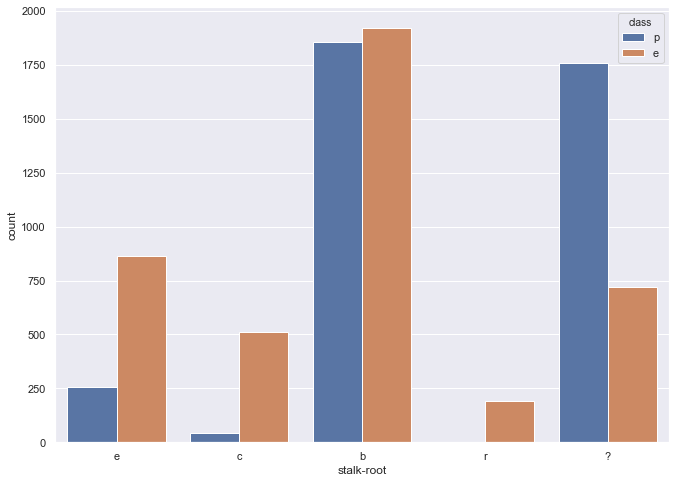

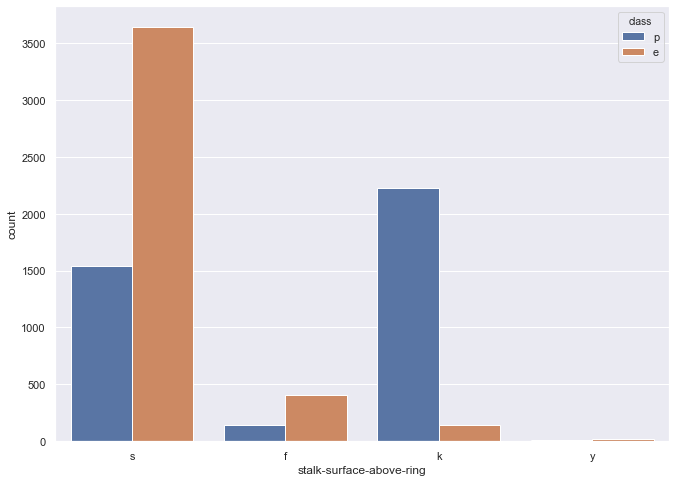

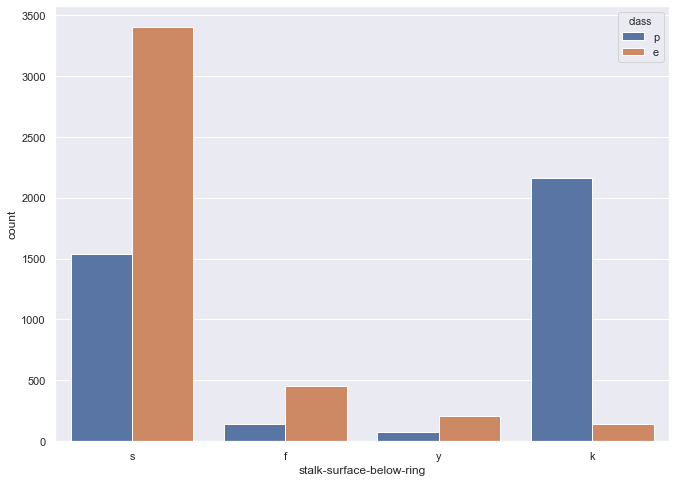

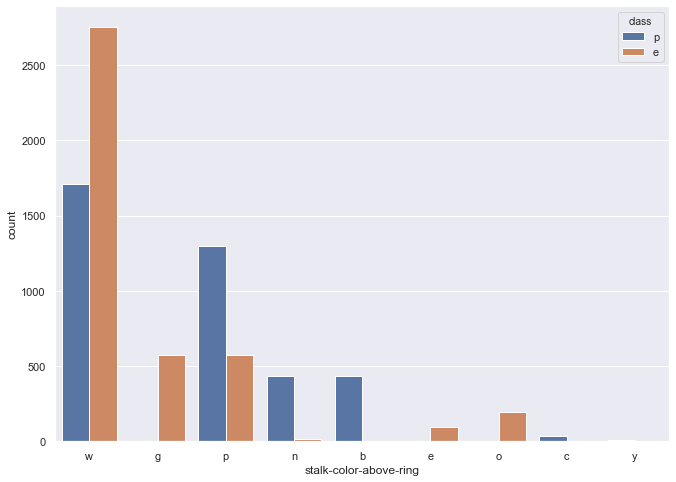

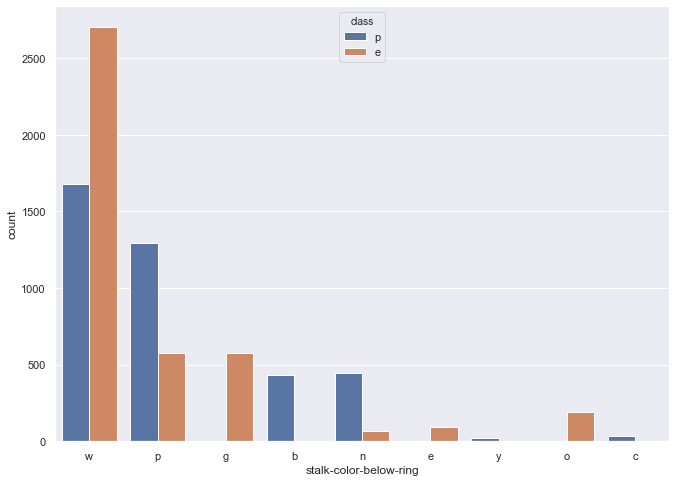

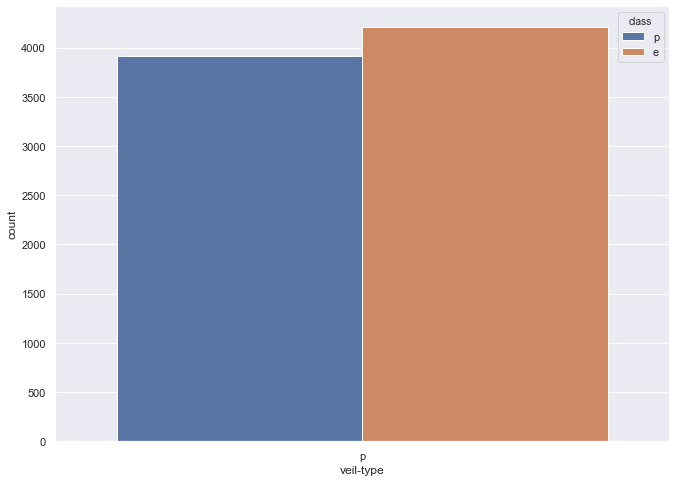

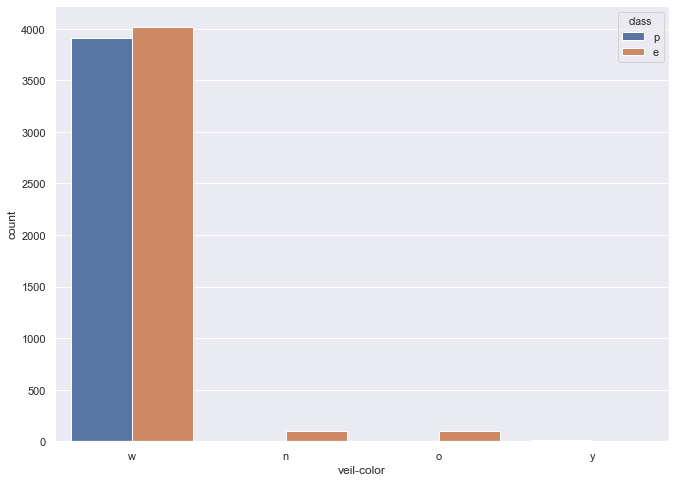

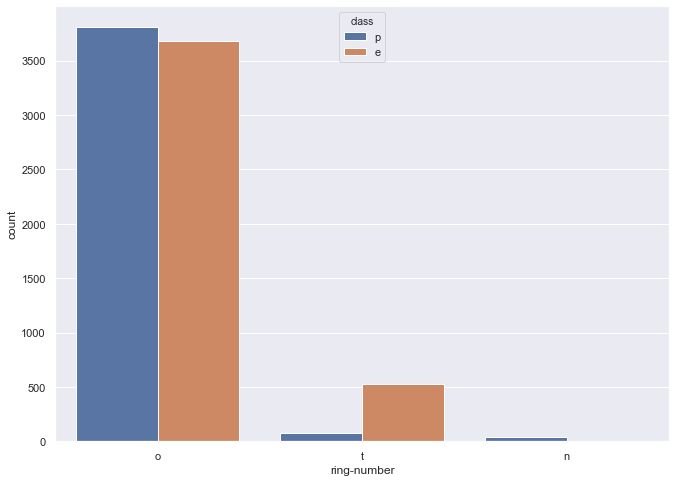

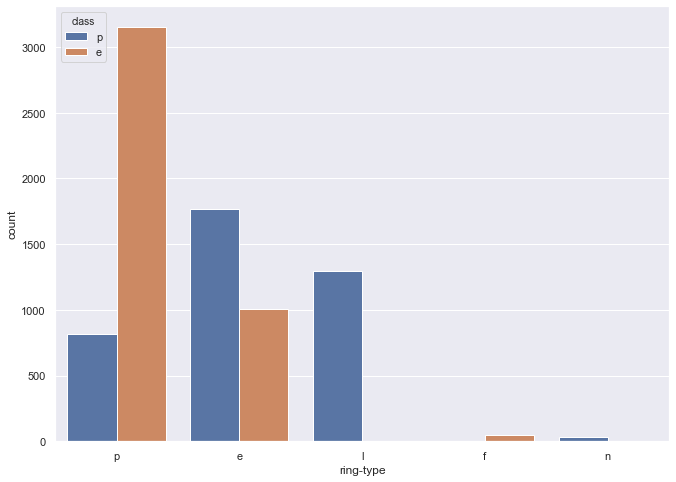

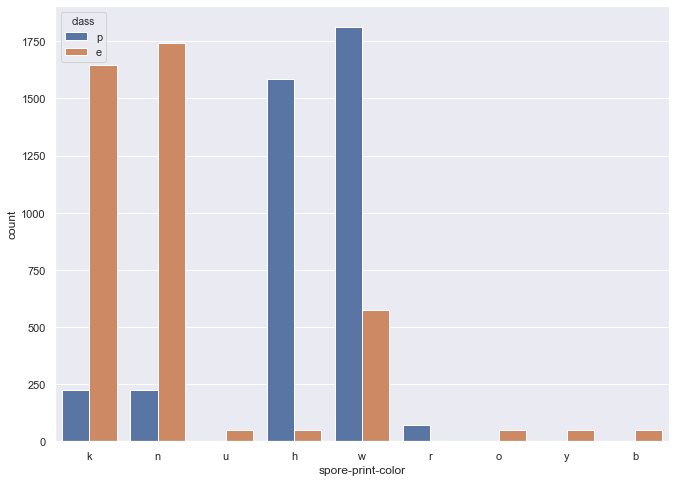

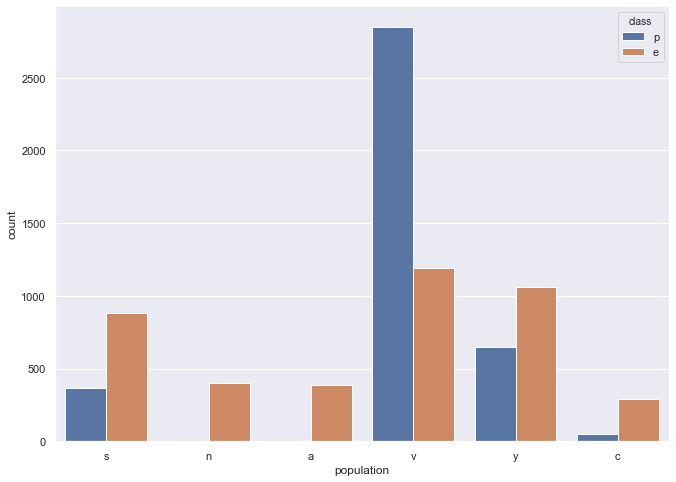

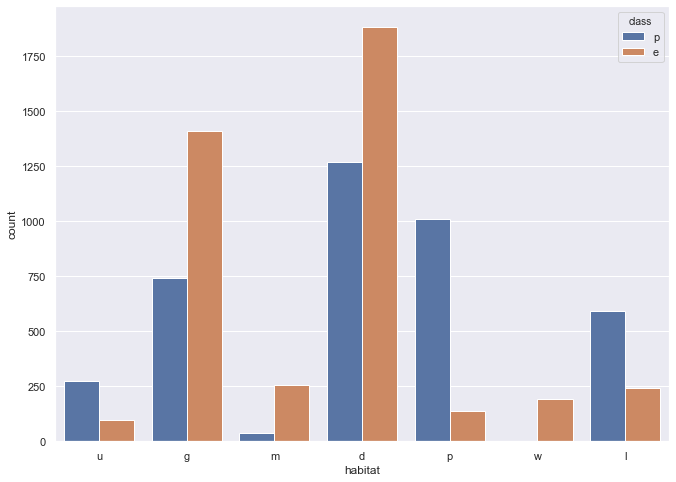

In [10]:
hue=ms['class']
plot=ms.iloc[:,1:]
plt_data(hue,plot)

In [11]:
le=LabelEncoder()
ms['class']=le.fit_transform(ms['class'])
ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
encoded_data=pd.get_dummies(ms)
encoded_data.head(5)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [13]:
x=encoded_data.drop('class',axis=1)
x.sample(3)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
145,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
5234,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5746,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [14]:
# performing pca on x for dimensionality-reduction 
pca=PCA(n_components=10) 
x=pca.fit_transform(x)
x.shape

(8124, 10)

In [15]:
y=ms.iloc[:,0]
y.sample(3)

6710    1
928     0
1752    0
Name: class, dtype: int32

In [16]:
# function to find the maximum accuracy score against random state
def M_acc(model):
    max_acc_score=0
    for acc in range(10,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=acc)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
    
        accuracy=accuracy_score(test_y,pred)
        if accuracy>max_acc_score:
            max_acc_score=accuracy
            final_acc_state=acc
    
    return final_acc_state,max_acc_score

In [17]:
# function to print the various informaion related to a particular model
def mod(state,model_name):
    for m in model:      
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=state)
        m.fit(train_x,train_y)
        pred=m.predict(test_x)
        score=cross_val_score(m,train_x,train_y,cv=14,scoring='accuracy').mean()

        print(model_name,'Model score is:',m.score(train_x,train_y),'\n')
        print('Accuracy score of',model_name,'model is : ',accuracy_score(test_y,pred),'\n')
        print('The mean of cross_val_score for the',model_name,'model is:',score,'\n')
        print('Confusion matrix for the',model_name,'model is : \n',confusion_matrix(test_y,pred),'\n')
        print('Classification report for the',model_name,'model is : \n',classification_report(test_y,pred),'\n')

In [18]:
# LogisticRegression model
lr=LogisticRegression()
print('Max accuracy score crossponding to random state is:',M_acc(lr))

final_acc_state,max_acc_score = M_acc(lr)
lr_acc=max_acc_score

Max accuracy score crossponding to random state is: (70, 0.9692307692307692)


In [19]:
# GaussianNB model
gnb=GaussianNB()
print('Max accuracy score crossponding to random state is:',M_acc(gnb))

final_acc_state,max_acc_score = M_acc(gnb)
gnb_acc=max_acc_score

Max accuracy score crossponding to random state is: (77, 0.9353846153846154)


In [20]:
# SVC model
svc=SVC()
print('Max accuracy score crossponding to random state is:',M_acc(svc))

final_acc_state,max_acc_score = M_acc(svc)
svc_acc=max_acc_score

Max accuracy score crossponding to random state is: (13, 1.0)


In [21]:
# DecisionTreeClassifier model
dtc=DecisionTreeClassifier()
print('Max accuracy score crossponding to random state is:',M_acc(dtc))

final_acc_state,max_acc_score = M_acc(dtc)
dtc_acc=max_acc_score

Max accuracy score crossponding to random state is: (18, 1.0)


In [22]:
# RandomForestClassifier model
rfc=RandomForestClassifier()
print('Max accuracy score crossponding to random state is:',M_acc(rfc))

final_acc_state,max_acc_score = M_acc(rfc)
rfc_acc=max_acc_score

Max accuracy score crossponding to random state is: (10, 1.0)


In [23]:
# GradientBoostingClassifier model
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate = 0.01, max_depth = 5)
print('Max accuracy score crossponding to random state is:',M_acc(gbc))

final_acc_state,max_acc_score = M_acc(gbc)
gbc_acc=max_acc_score

Max accuracy score crossponding to random state is: (13, 0.9987692307692307)


In [24]:
# KNeighborsClassifier model
knc=KNeighborsClassifier()
print('Max accuracy score crossponding to random state is:',M_acc(knc))

final_acc_state,max_acc_score = M_acc(knc)
knc_acc=max_acc_score

Max accuracy score crossponding to random state is: (11, 1.0)


In [25]:
# comparing the performances of all the model
model_performance = pd.DataFrame({
    'Model': ['RandomForestClassifier','SVC','GaussianNB','DecisionTreeClassifier','LogisticRegression','KNeighborsClassifier','GradientBoostingClassifier'],
    'Accuracy': [rfc_acc,svc_acc,gnb_acc,dtc_acc,lr_acc,knc_acc,gbc_acc]})

model_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,RandomForestClassifier,1.000000
1,SVC,1.000000
5,KNeighborsClassifier,1.000000
3,DecisionTreeClassifier,0.999385
6,GradientBoostingClassifier,0.998769
4,LogisticRegression,0.969231
2,GaussianNB,0.935385


In [26]:
model=[SVC()]
mod(state=13,model_name='SVC')

SVC Model score is: 0.996768733651331 

Accuracy score of SVC model is :  1.0 

The mean of cross_val_score for the SVC model is: 0.9960008403522856 

Confusion matrix for the SVC model is : 
 [[842   0]
 [  0 783]] 

Classification report for the SVC model is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 



In [27]:
svc=SVC()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=13)
svc.fit(train_x,train_y)
pred=svc.predict(test_x)
score=cross_val_score(svc,train_x,train_y,cv=14,scoring='accuracy').mean()

print('SVC model score',svc.score(train_x,train_y),'\n')
print('Accuracy score of model is : ',accuracy_score(test_y,pred),'\n')
print('The mean of cross_val_score for the model is:',score,'\n')
print('Confusion matrix for the model is : \n',confusion_matrix(test_y,pred),'\n')
print('Classification report for the model is : \n',classification_report(test_y,pred),'\n')

SVC model score 0.996768733651331 

Accuracy score of model is :  1.0 

The mean of cross_val_score for the model is: 0.9960008403522856 

Confusion matrix for the model is : 
 [[842   0]
 [  0 783]] 

Classification report for the model is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 



In [28]:
import joblib
# saving the model using pickle.
joblib.dump(svc,'svc_5. Mushroom Dataset.pkl')

['svc_5. Mushroom Dataset.pkl']